In [1]:
from __future__ import print_function, division
import os
import torch
import glob 
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
folder_path = os.path.dirname("/Users/alex_christlieb/Desktop/small_sample_out/")
# image_paths = glob.glob("/Users/alex_christlieb/Desktop/small_sample_out/*.jpeg")

In [3]:
metadata = pd.read_hdf(os.path.join(folder_path, "metadata_sample.hdf"),'/d')
metadata

,building_id,image_buffer,image_provider,b_outline,b_surfaces,panel_polygons,panel_centroids
0,78a6cd53-5fe9-4a91-b328-be04817f73f1,15,C,"[[378, 112], [378, 387], [121, 387], [121, 112...","[[392, 134], [152, 404], [213, 450], [453, 180...","[[[172, 367], [154, 353], [164, 342], [182, 35...","[[168, 355], [149, 341], [178, 343], [159, 329..."
0,8724d454-483a-4e0d-8e4b-1f45666fd0c6,15,C,"[[395, 131], [395, 368], [104, 368], [104, 131...","[[[248, 335], [196, 184], [125, 223], [132, 24...","[[[142, 227], [159, 218], [164, 233], [148, 24...","[[153, 230], [170, 221], [187, 211], [176, 237..."
0,41f7159f-7cd1-45ab-87b1-1fa761ff2aba,15,C,"[[330, 130], [330, 369], [169, 369], [169, 130...","[[225, 298], [203, 424], [345, 439], [392, 171...","[[[281, 355], [246, 352], [250, 332], [284, 33...","[[265, 344], [230, 340], [195, 337], [269, 324..."
0,4df4d98d-4042-47c0-8331-1f63a5e536c7,15,C,"[[387, 145], [387, 354], [112, 354], [112, 145...","[[[260, 294], [246, 209], [165, 145], [139, 20...","[[[241, 232], [228, 259], [215, 249], [228, 22...","[[228, 240], [214, 230], [201, 219], [188, 209..."
0,71c524ac-1c82-4ba7-9731-0fc0d0f970a2,15,C,"[[329, 136], [126, 297], [171, 363], [174, 360...","[[394, 164], [152, 357], [205, 435], [209, 432...","[[[177, 353], [164, 335], [178, 323], [191, 34...","[[177, 338], [164, 319], [151, 301], [192, 327..."
...,...,...,...,...,...,...,...
0,410de536-b389-481d-a893-12b6ae7fd9e1,15,C,"[[374, 124], [374, 375], [125, 375], [125, 124...","[[[279, 254], [239, 357], [288, 375], [314, 30...","[[[287, 366], [267, 358], [273, 342], [293, 35...","[[280, 354], [260, 346], [286, 338], [266, 330..."
0,5a868e68-edd9-4d4c-8fb8-1d30b56c0f49,15,C,"[[390, 93], [390, 406], [109, 406], [109, 93],...","[[[262, 272], [266, 243], [236, 211], [227, 26...","[[[256, 268], [234, 266], [236, 254], [257, 25...","[[246, 261], [248, 248], [231, 309], [209, 307..."
0,b33e39fb-e42e-4cd6-a18b-0359f7d9fc9d,15,C,"[[322, 143], [322, 356], [177, 356], [177, 143...","[[213, 211], [254, 427], [377, 413], [336, 196...","[[[297, 336], [261, 340], [257, 321], [293, 31...","[[277, 328], [240, 333], [273, 308], [236, 313..."
0,2d5c5e72-bf4a-4e02-8768-5dd987583398,15,C,"[[333, 157], [333, 342], [166, 342], [166, 157...","[[399, 243], [275, 198], [210, 365], [331, 410...","[[[274, 329], [244, 318], [252, 299], [282, 31...","[[263, 314], [233, 303], [203, 292], [271, 294..."


In [9]:
"""Define list of buildings to plot"""

import random as rand
list_names = []
for i in range(10):
    list_names.append(rand.choice(metadata.building_id.to_list()))

# list_names = metadata.building_id.to_list()


In [6]:
def count_list(list_of_lists):
    """Counts the amount of nested lists. Used for plotting"""
    if not isinstance(list_of_lists, list):
        return 0
    return max(map(count_list, list_of_lists), default=0) + 1

In [11]:
def plot_building(image, centroids = None, surface= None, base = None, polygons = None):
    """Plot image with desired attributes"""
    plt.figure()
    plt.imshow(image)
    plt.axis("off")

    if centroids is not None:
        plt.scatter(centroids[:, 1], centroids[:, 0], s=10, marker='.', c='k')
    
    
    if base is not None:
        plt.plot(base[:, 1], base[:, 0], marker='.', c='b')

    if polygons is not None:
        for p in polygons:
            plt.plot(p[:, 1], p[:, 0], marker='.', c='r')

    if surface is not None:
        if not isinstance(surface,np.ndarray): 
            for s in surface:
                s = np.array(s)
                plt.plot(s[:, 1], s[:, 0], marker='.', c='g')
        else:
            plt.plot(surface[:, 1], surface[:, 0], marker='.', c='g')

    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()

In [8]:
def plot_from_id(img_name):
    """Plot a building given the building id"""
    image_path = "/Users/alex_christlieb/Desktop/small_sample_out/"+img_name+"-b15-otovowms.jpeg" #Variable to be set according to computer 
    img_data = metadata[metadata["building_id"] == img_name]
    centroids = np.array(img_data["panel_centroids"][0]).astype('float')

    surface = (img_data["b_surfaces"][0])#list of np arrays

    if count_list(surface) == 2:
        surface = np.array(img_data["b_surfaces"][0]).astype('float')

    polygons = np.array(img_data["panel_polygons"][0]).astype('float')
    base = np.array(img_data["b_outline"][0]).astype('float')

    print(f"Image name: {img_name}")
    plot_building(io.imread(image_path), centroids, surface = surface, base = base, polygons = polygons)
    plot_building(io.imread(image_path), centroids)



--- 0
Image name: 190654f9-2d1a-43f2-9402-30bf9bb41974


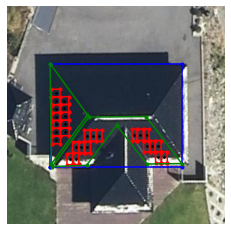

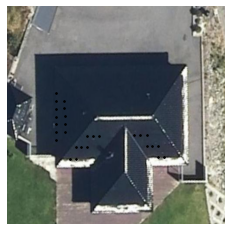

--- 1
Image name: 0e628327-90dd-4a77-ad21-b631c96ee671


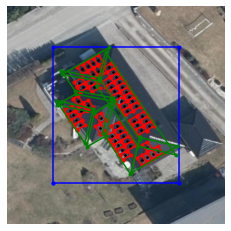

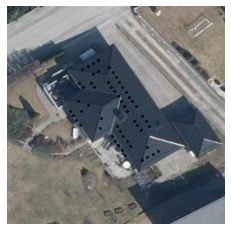

--- 2
Image name: fa1da4f4-45bc-41f7-983d-cb44949a366d


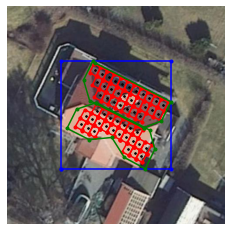

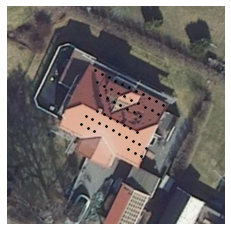

--- 3
Image name: ecc88776-6260-4dfb-a21d-0f8277cad398


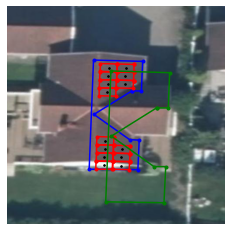

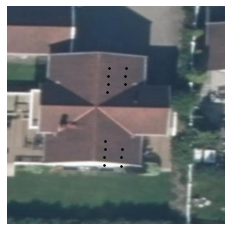

--- 4
Image name: 190654f9-2d1a-43f2-9402-30bf9bb41974


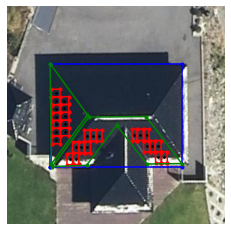

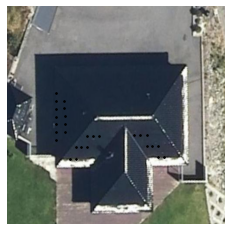

--- 5
Image name: b7e04765-5e5b-450a-86e7-545db832b0d9


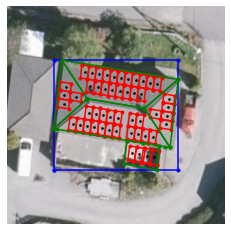

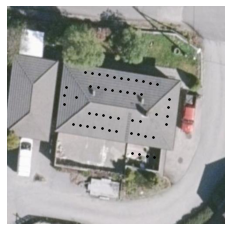

--- 6
Image name: abd0f095-f84f-4797-b7e2-d5e92fff1ac7


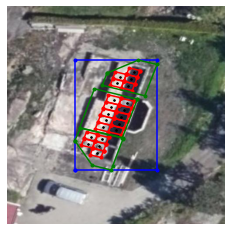

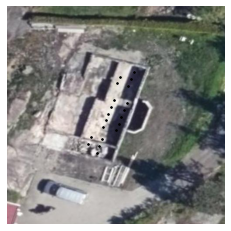

--- 7
Image name: 4df4d98d-4042-47c0-8331-1f63a5e536c7


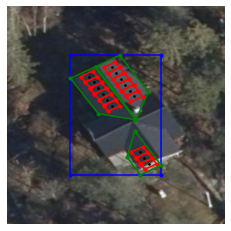

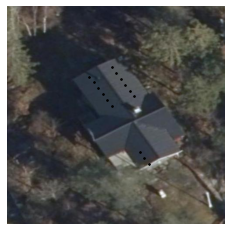

--- 8
Image name: 5a868e68-edd9-4d4c-8fb8-1d30b56c0f49


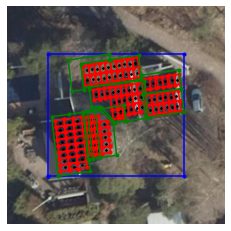

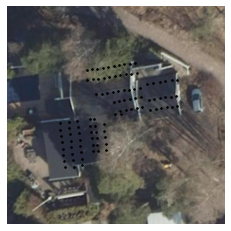

--- 9
Image name: 4df4d98d-4042-47c0-8331-1f63a5e536c7


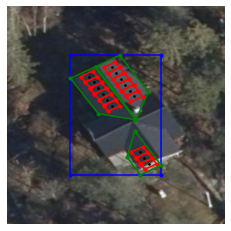

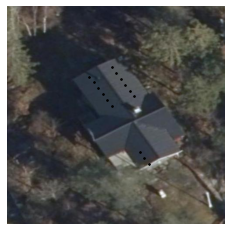

In [12]:
"""Plot the list_names"""
num = 0
for i in list_names:
    print("---",num)
    plot_from_id(i)
    num += 1

## Trying new stuff

In [33]:
import kornia
import cv2
from torch.distributions import normal

In [18]:
img_id = "4df4d98d-4042-47c0-8331-1f63a5e536c7"
image_filepath = "/Users/alex_christlieb/Desktop/small_sample_out/"+img_id+"-b15-otovowms.jpeg"

In [21]:
image = cv2.imread(image_filepath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_data = metadata[metadata["building_id"] == img_id]
centroids = np.array(img_data["panel_centroids"][0]).astype('float')

In [37]:
from torch.distributions import MultivariateNormal

def generate_heatmap(centroids, img_size):
    """Return heatmap from centroid coordinates"""
    

In [41]:
m = MultivariateNormal(torch.zeros(3), torch.eye(3))

In [42]:
m.sample()

tensor([0.5355, 0.4737, 0.8952])

In [ ]:
def gaussuian_filter(kernel_size, sigma=1, muu=0):
 
    # Initializing value of x,y as grid of kernel size
    # in the range of kernel size
 
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    dst = np.sqrt(x**2+y**2)
 
    # lower normal part of gaussian
    normal = 1/(2, 0 * np.pi * sigma**2)
 
    # Calculating Gaussian filter
    gauss = np.exp(-((dst-muu)**2 / (2.0 * sigma**2))) * normal
 
 
kernel_size=5
gaussian = gaussian_filter(kernel_size)
print("gaussian filter of{} X {} :".format(kernel_size,kernel_size))
print(gaussian)